#### Author: Diogo Viana

#### Data Scientist

2023

Contact information:
- https://github.com/DiogocViana
- https://www.linkedin.com/in/diogo-viana/

COMPETITION-SPECIFIC TERMS
COMPETITION TITLE: Titanic - Machine Learning from Disaster

COMPETITION SPONSOR: Kaggle

COMPETITION SPONSOR ADDRESS: 1600 Amphitheatre Pkwy, Mountain View, CA 94043

COMPETITION WEBSITE: https://www.kaggle.com/c/titanic

DATA ACCESS AND USE: Competition Use and Academic, Non-Commercial Use Only

## Introduction

### The goal was to predict survivors of the tragic sinking of the titanic based passenger information such as age, sex and socio-economic status.



Columns in the dataset
The columns present in the dataset are as follows:

    1.PassengerId: This column assigns a unique identifier for each passenger.
    
    2.Survived: Specifies whether the given passenger survived or not (1 - survived, 0 - did not survive)
    
    3.Pclass: The passenger's class. (1 = Upper Deck, 2 = Middle Deck, 3 = Lower Deck)
    
    4.Name: The name of the passenger.
    
    5.Sex: The sex of the passenger (male, female)
    
    6.Age: The age of the passenger in years. If the age is estimated, is it in the form of xx.5.
    
    7.SibSp: How many siblings or spouses the passenger had on board with them. Sibling = brother, sister, stepbrother, stepsister and Spouse = husband, wife (mistresses and fiancés were ignored)
    
    8.Parch: How many parents or children the passenger had on board with them. Parent = mother and father, child = daughter, son, stepdaughter and stepson and some children travelled only with a nanny, therefore parch=0 for them.
    
    9.Ticket: The ticket of the passenger.
    
    10.Fare: The fare amount paid by the passenger for the trip.
    
    11.Cabin: The cabin in which the passenger stayed.
    
    12.Embarked: The place from which the passenger embarked (C = Cherbourg; Q = Queenstown; S = Southampton)

In the next part I will import the libraries that I will use during my analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.regression import linear_model
from scipy import stats
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Splitting data
from sklearn.model_selection import train_test_split 

# Scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

# Classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import time

After importing the libraries, I will tell Python to read the csv file.

In [2]:
# I am calling the Train dataframe as train and Test dataframe as test

df = pd.read_csv("train.csv")

df_test = pd.read_csv("test.csv")

Now that I have read the file, I will check it by doing an exploratory data analysis (EDA).

## Data Cleaning

**Preparing the data**

Now, I will complete the data cleaning on the train dataset.

In [3]:
# Checking the first rows in order to know what I have for my analysis

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It looks like the Passengerid is a unique identifier.


In the next line, I will rename some of the columns in order to easily read it

In [4]:
df.columns = ['passenger_id','survived','passenger_class','name','sex','age','sib_sp','parch','ticket','fare','cabin','embarked']

In [5]:
# Checking new columns name

df.head()

,passenger_id,survived,passenger_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Checking the size
df.shape

(891, 12)

As observed, in this dataset, there are 891 rows and 12 variables.

##### Next steps:

- Check for duplicated data

- Check for missing data

- Check data types and formats

**Step 1**

- Check for duplicated data

In [7]:
df.duplicated().sum()

0

The dataset has no duplicates.

**Step 2**
- Check for missing data

In [8]:
# Summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_id     891 non-null    int64  
 1   survived         891 non-null    int64  
 2   passenger_class  891 non-null    int64  
 3   name             891 non-null    object 
 4   sex              891 non-null    object 
 5   age              714 non-null    float64
 6   sib_sp           891 non-null    int64  
 7   parch            891 non-null    int64  
 8   ticket           891 non-null    object 
 9   fare             891 non-null    float64
 10  cabin            204 non-null    object 
 11  embarked         889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we could see, there are missing values in the column `age`, `cabin` and `embarked`.

I will check how many:

In [9]:
df.isnull().sum()

passenger_id         0
survived             0
passenger_class      0
name                 0
sex                  0
age                177
sib_sp               0
parch                0
ticket               0
fare                 0
cabin              687
embarked             2
dtype: int64

Summarizing:

    - age -> 177 missing values
    - cabin -> 687 missing values
    - embarked -> 2 missing values

In [10]:
# Checking the percentage of missing values

df.isna().sum() / df.shape[0]*100.0

passenger_id        0.000000
survived            0.000000
passenger_class     0.000000
name                0.000000
sex                 0.000000
age                19.865320
sib_sp              0.000000
parch               0.000000
ticket              0.000000
fare                0.000000
cabin              77.104377
embarked            0.224467
dtype: float64

We can see that nearly 80% of data is missing in the `cabin` column. Other fields such as `age` and `embarked` have ~20% and 0.22% respectively. We may need to have to deal with these values.


I will investigate and try to fix it after completing the `Step 3`.

**Step 3**
- Data-types and formats

In [11]:
# Check using .dtypes

df.dtypes

passenger_id         int64
survived             int64
passenger_class      int64
name                object
sex                 object
age                float64
sib_sp               int64
parch                int64
ticket              object
fare               float64
cabin               object
embarked            object
dtype: object

Observing the above result, the data set is formed for a variety of both string and numeric data types for the different variables.

Now that I have checked the dataset, I will start to fix some of the issues found previously.

**Early assumptions**

In [12]:
df.head()

,passenger_id,survived,passenger_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Considerations:

- `passenger_id` and `name` should not give us any helpful information about the objective of this work. Therefore, I will drop both columns.



- As a result of the above code, we observed the existence of missing values in the columns `age`, `cabin`, and `embarked`. The `cabin` column missing values are probably related to some of the passengers do not have a cabin. Therefore, I will input the information manually. However, the columns `age` and `embarked` missing values are probably just missing data.



- As we could observe previously, there is a mixing of categorical and numerical columns in our dataset. I need to check which categorical column I am able to turn into a numerical column.

*First I will execute the code to drop the `passenger_id` and `name` columns.*

In [13]:
df.drop('passenger_id', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)

In [14]:
# Checking if it worked

df.head(2)

,survived,passenger_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C


*Next, I will transform the `sex` column into numerical by converting into a binary in the following way:

*Female - 0*

*Male - 1*

In [15]:
df['sex'] = np.where(df['sex']=='female', 0, 1)

In [16]:
# Checking if it worked

df.head(2)

,survived,passenger_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C


**Now I will investigate the `age` column to fix the NaN issue.**

**Age**

It appears about 20% of data is missing in the `age` column. Let us now investigate the distribution of age in the data in order to be able to move forward. We can agree that 20% of the data is too much to drop in this case.

In [17]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [18]:
df['age'].median()

28.0

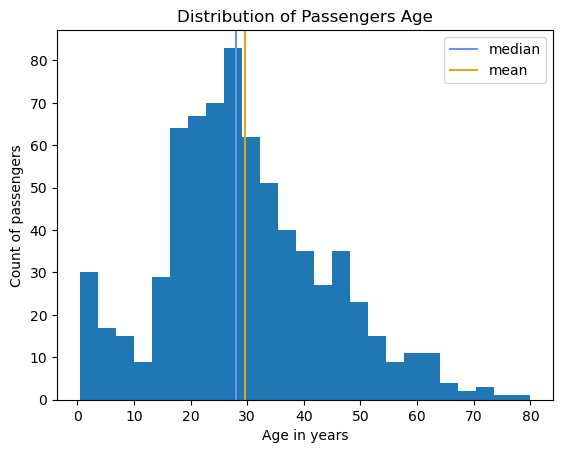

In [19]:
# Visualize
plt.figure()

plt.hist(df['age'], bins=25)

# Overplot mean and median ages
plt.axvline(df['age'].median(), color='cornflowerblue', label='median')
plt.axvline(df['age'].mean(), color='goldenrod', label='mean')

plt.title('Distribution of Passengers Age')
plt.xlabel('Age in years')
plt.ylabel('Count of passengers')
plt.legend()

plt.show()

Looking at the above, we could see that the distribution of ages appears somewhat normalish with right skew. Most of the passengers lie in the range between ~15-30 years of age. Very few passengers are 50 years old or above. As we could observe a steep rise between ages ~12-15 and very few passengers 65+.

Most passengers appear to be in the bin of ~28 years old.

In [20]:
df['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

However the median is 28 years old, since the age with most passengers is 24 years old, I will input the missing ages as age 24.

In [21]:
df['age'] = df['age'].fillna(24.0)

In [22]:
# Check

df['age'].isna().sum()

0

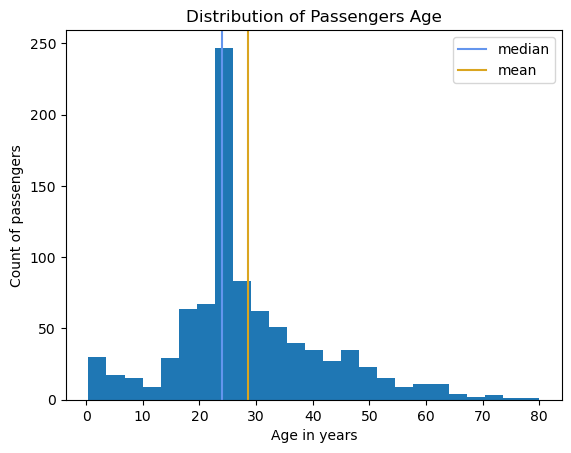

In [23]:
# Visualize
plt.figure()

plt.hist(df['age'], bins=25)

# Overplot mean and median ages
plt.axvline(df['age'].median(), color='cornflowerblue', label='median')
plt.axvline(df['age'].mean(), color='goldenrod', label='mean')

plt.title('Distribution of Passengers Age')
plt.xlabel('Age in years')
plt.ylabel('Count of passengers')
plt.legend()

plt.show()

Age is done. What else is missing?

In [24]:
df.isna().sum()

survived             0
passenger_class      0
sex                  0
age                  0
sib_sp               0
parch                0
ticket               0
fare                 0
cabin              687
embarked             2
dtype: int64

Now we must address imputing values for *categorical* data such as `cabin`and `embarked`.

**Cabin column - categorical**

First, let us look at all the distinct values for the `cabin` column.

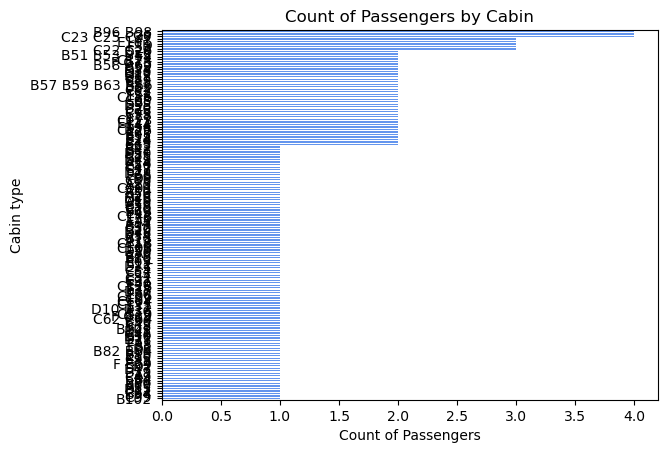

In [25]:
df['cabin'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue')
plt.title('Count of Passengers by Cabin')
plt.ylabel('Cabin type')
plt.xlabel('Count of Passengers')
plt.show()

Evidently, there are a lot of distinct cabins! Let's make this visual a bit taller.

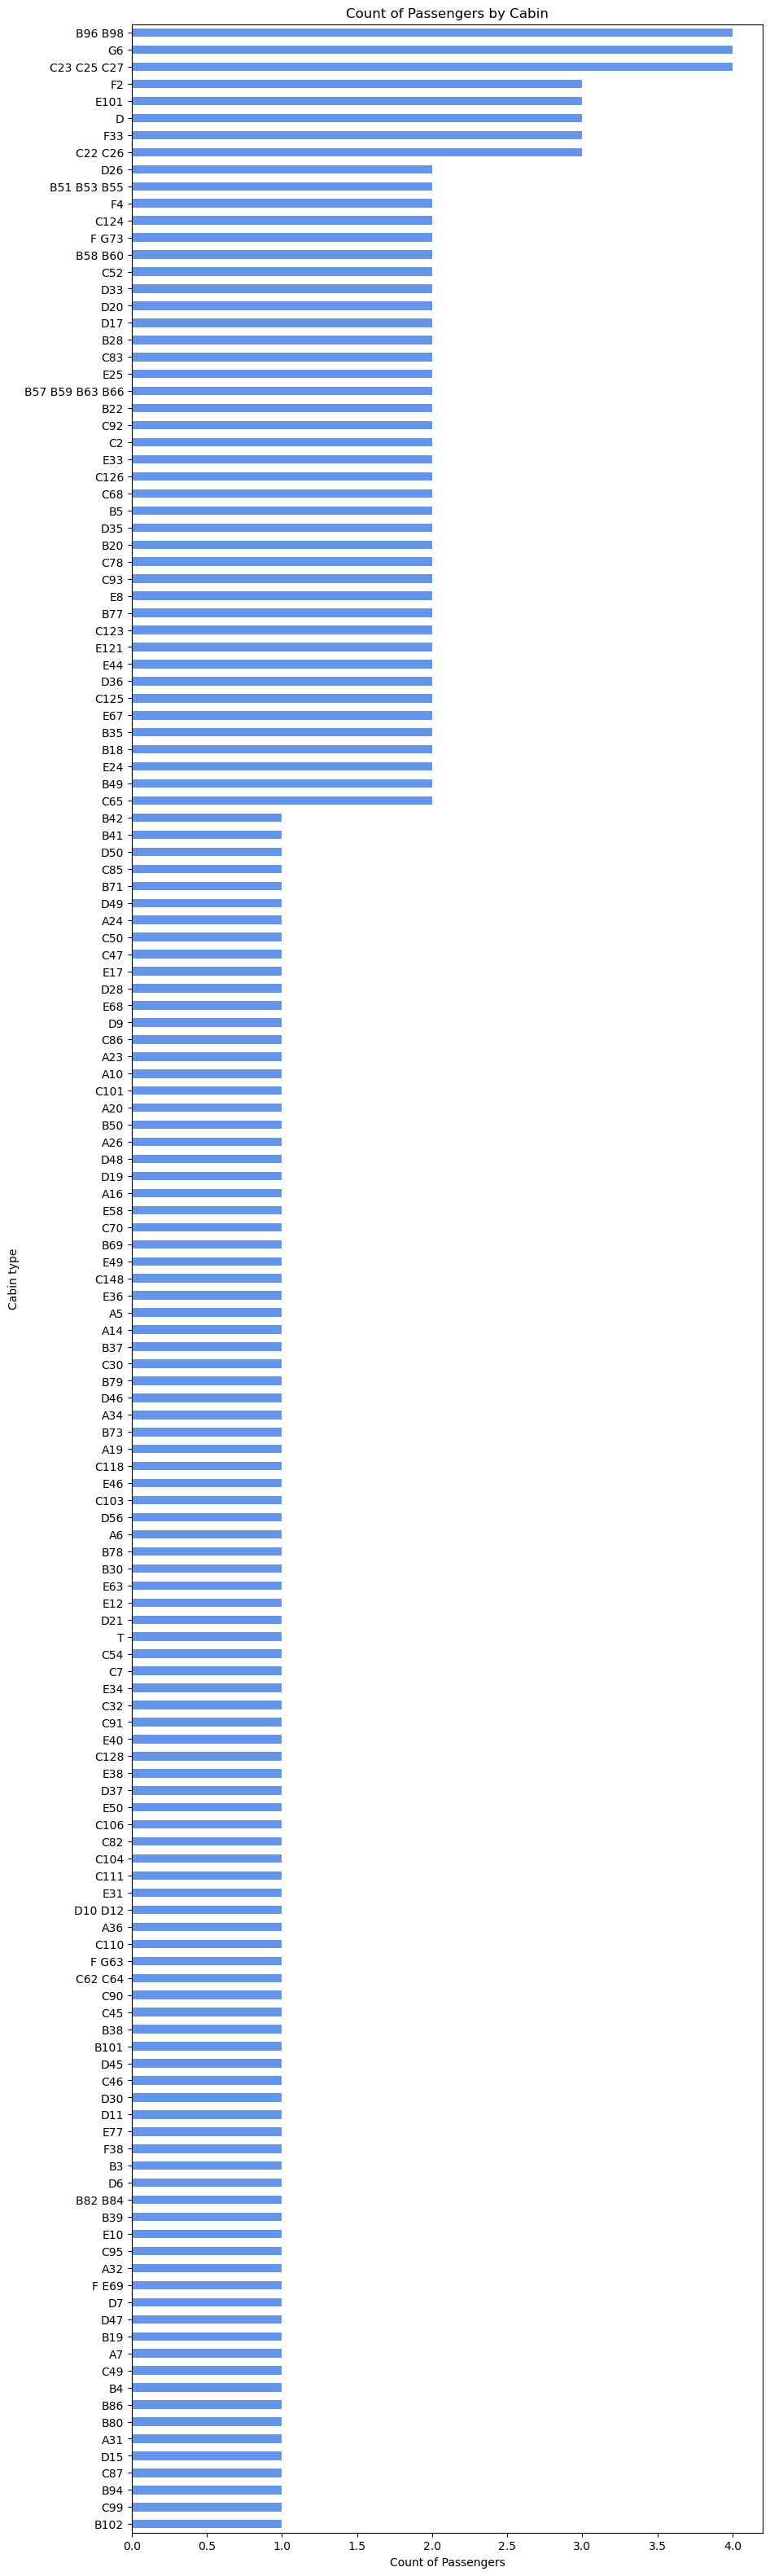

In [26]:
plt.figure(figsize=(10, 40))
df['cabin'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue')
plt.title('Count of Passengers by Cabin')
plt.ylabel('Cabin type')
plt.xlabel('Count of Passengers')
plt.show()

In [27]:
df['cabin'].value_counts(normalize=True)*100.0

B96 B98        1.960784
G6             1.960784
C23 C25 C27    1.960784
C22 C26        1.470588
F33            1.470588
                 ...   
E34            0.490196
C7             0.490196
C54            0.490196
E36            0.490196
C148           0.490196
Name: cabin, Length: 147, dtype: float64

By looking at the graphic we could not conclude much. On the other hand, by observing the above, it is possible to conclude that the majority of passengers are in the `B96`, `B98`, `G6`, `C23`, `C25` and `C27`. A small number is in the cabins `E34`, `C7`, `C54`, `E36` and `C148`.

However, one of our assumptions was that the missing data from the `cabin` column might be that the passengers did not have a cabin. We will use `unknown` for the input.

In [28]:
# Set missing values as unknown

df['cabin'] = df['cabin'].fillna('unknown')

In [29]:
# Check
df['cabin'].isna().sum()

0

**Embarked column - categorical**

Let's take a look at the distinct counts for the embarked column:

In [30]:
df['embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: embarked, dtype: float64

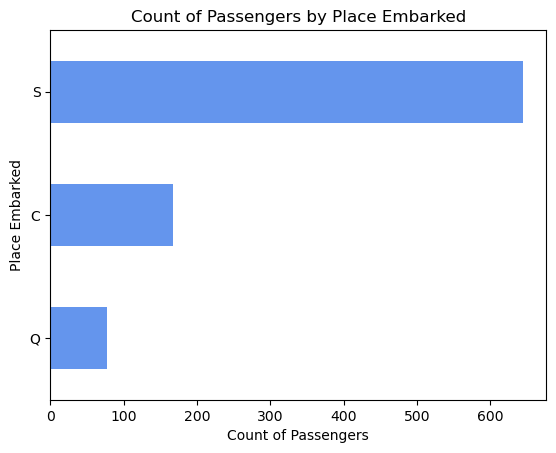

In [31]:
df['embarked'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue')
plt.title('Count of Passengers by Place Embarked')
plt.ylabel('Place Embarked')
plt.xlabel('Count of Passengers')
plt.show()

Looking at the above, a great deal of passengers embarked by `S` (~73%). On the other hand, less than 10% of the passengers embarked by `Q`.

In order to fix the NaN issue, since there are only two missing values, I will fill in the missing data as `C`.

In [32]:
# Set missing values to unknown
df['embarked'] = df['embarked'].fillna('C')

In [33]:
# Check
df['embarked'].isna().sum()

0

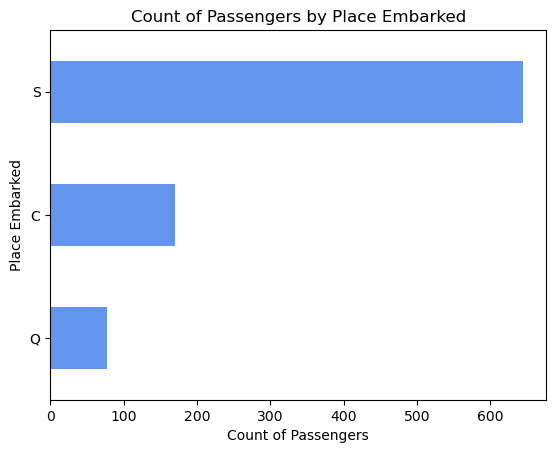

In [34]:
df['embarked'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue')
plt.title('Count of Passengers by Place Embarked')
plt.ylabel('Place Embarked')
plt.xlabel('Count of Passengers')
plt.show()

In [35]:
df['embarked'].value_counts(normalize=True)

S    0.722783
C    0.190797
Q    0.086420
Name: embarked, dtype: float64

In [36]:
df.isna().sum()

survived           0
passenger_class    0
sex                0
age                0
sib_sp             0
parch              0
ticket             0
fare               0
cabin              0
embarked           0
dtype: int64

There are no more missing values, we have imputed all missing values. We can now proceed to a more detailed exploratory data analysis given this. We can also proceed forward at a later point confidently with modeling work, as there are no missing values.

*****
## Exploratory Data Analysis - EDA

Now that we've cleaned the data, let's do some analysis to address our original question: " Could we predict survivors of the tragic sinking of the Titanic based on passenger information such as age, sex and socio-economic status?"


We will divide our data into categorical and numeric and proceed in this way, but first I will check the unique values for each column.

**I will start the EDA by checking the unique values for each column**

**Summary of the unique values for each column:**

In [37]:
df.nunique()

survived             2
passenger_class      3
sex                  2
age                 88
sib_sp               7
parch                7
ticket             681
fare               248
cabin              148
embarked             3
dtype: int64

Now, I will check which column individually:

In [38]:
df['survived'].unique

<bound method Series.unique of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64>

In [39]:
df['survived'].nunique()

2

As we could see, there are only two unique values in the `suvived` column. Where `1` is when the passenger survived and `0` otherwise.

In [40]:
df['passenger_class'].unique

<bound method Series.unique of 0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: passenger_class, Length: 891, dtype: int64>

In [41]:
df['passenger_class'].nunique()

3

There are three classes: `1`, `2` and `3`. As explained before: `1= Upped Deck`, `2= Middle Deck` and `3= Lower Deck`.

In [42]:
df['sex'].unique

<bound method Series.unique of 0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: sex, Length: 891, dtype: int32>

In [43]:
df['sex'].nunique()

2

As we could see, as the result of the transformation into binary, there are only two unique values in the `sex` column. Where `female = 1` and `male = 0`.

In [44]:
df['age'].unique

<bound method Series.unique of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64>

In [45]:
df['age'].nunique()

88

There are 88 unique values for the `age` column.

In [46]:
df['sib_sp'].unique

<bound method Series.unique of 0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: sib_sp, Length: 891, dtype: int64>

In [47]:
df['sib_sp'].nunique()

7

As we could observe from above, there are 7 different values in the `sib_sp` column.

In [48]:
df['parch'].unique

<bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: parch, Length: 891, dtype: int64>

In [49]:
df['parch'].nunique()

7

As we could observe from above, there are 7 different values in the `parch` column.

In [50]:
df['ticket'].unique

<bound method Series.unique of 0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: ticket, Length: 891, dtype: object>

In [51]:
df['ticket'].nunique()

681

There are 681 unique values for the `ticket` column.

In [52]:
df['fare'].unique

<bound method Series.unique of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64>

In [53]:
df['fare'].nunique()

248

In the `fare` column, there are 248 unique values.

In [54]:
df['cabin'].unique

<bound method Series.unique of 0      unknown
1          C85
2      unknown
3         C123
4      unknown
        ...   
886    unknown
887        B42
888    unknown
889       C148
890    unknown
Name: cabin, Length: 891, dtype: object>

In [55]:
df['cabin'].nunique()

148

As we could see, there are 148 different `cabin`. However, as we know, there are a few passengers with no cabin.

In [56]:
df['embarked'].unique

<bound method Series.unique of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object>

In [57]:
df['embarked'].nunique()

3

The passengers embarked in three different ways.

**Now that I investigated the unique values, I will explore the data to understand better the information**

Let check how many passengers survived:

In [58]:
# I am creating a copy dataframe to not change the original data for now

df_1 = df.copy()

In [59]:
# I will rename the 0 & 1 of the column survived. Where 1 I am calling Survived and 0 Not Survived

df_1['survived'].replace({1: "Survived", 0: "Not Survived"}, inplace=True)

In [60]:
# I will rename the 0 & 1 of the column survived. Where 1 I am calling Survived and 0 Not Survived

df_1['sex'].replace({1: "Male", 0: "Female"}, inplace=True)

In [61]:
# Checking if it worked

df_1.head()

,survived,passenger_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,Not Survived,3,Male,22.0,1,0,A/5 21171,7.2500,unknown,S
1,Survived,1,Female,38.0,1,0,PC 17599,71.2833,C85,C
2,Survived,3,Female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,Survived,1,Female,35.0,1,0,113803,53.1000,C123,S
4,Not Survived,3,Male,35.0,0,0,373450,8.0500,unknown,S


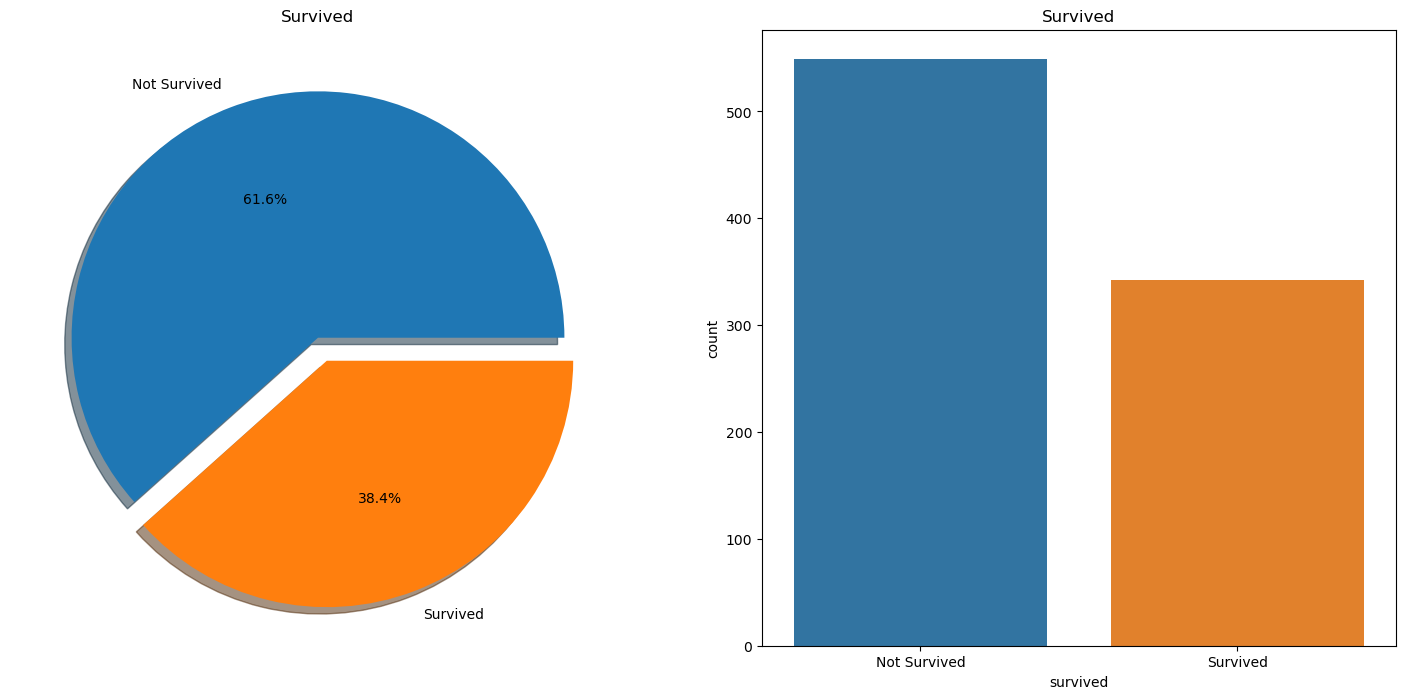

In [62]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_1['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='survived', data=df_1, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

As it was expected, we can observe that less than a half of the passengers survived the tragedy. Only around 340 (38%) of the training data set survived the tragedy.

I will need to investigate more to understand which categories of passengers did survive and who did not.

In [63]:
df_1.groupby(['sex', 'survived'])['survived'].count()
# Column Sex: 
# Female- 0 & Male- 1

# Column Survived:
# Not survived- 0 & Survived- 1

sex     survived    
Female  Not Survived     81
        Survived        233
Male    Not Survived    468
        Survived        109
Name: survived, dtype: int64

In [64]:
# I will create another copy of df because df_1 will not work due to not having numeric data in the column survived

df_2 = df.copy()

In [65]:
df_2['sex'].replace({1: "Male", 0: "Female"}, inplace=True)

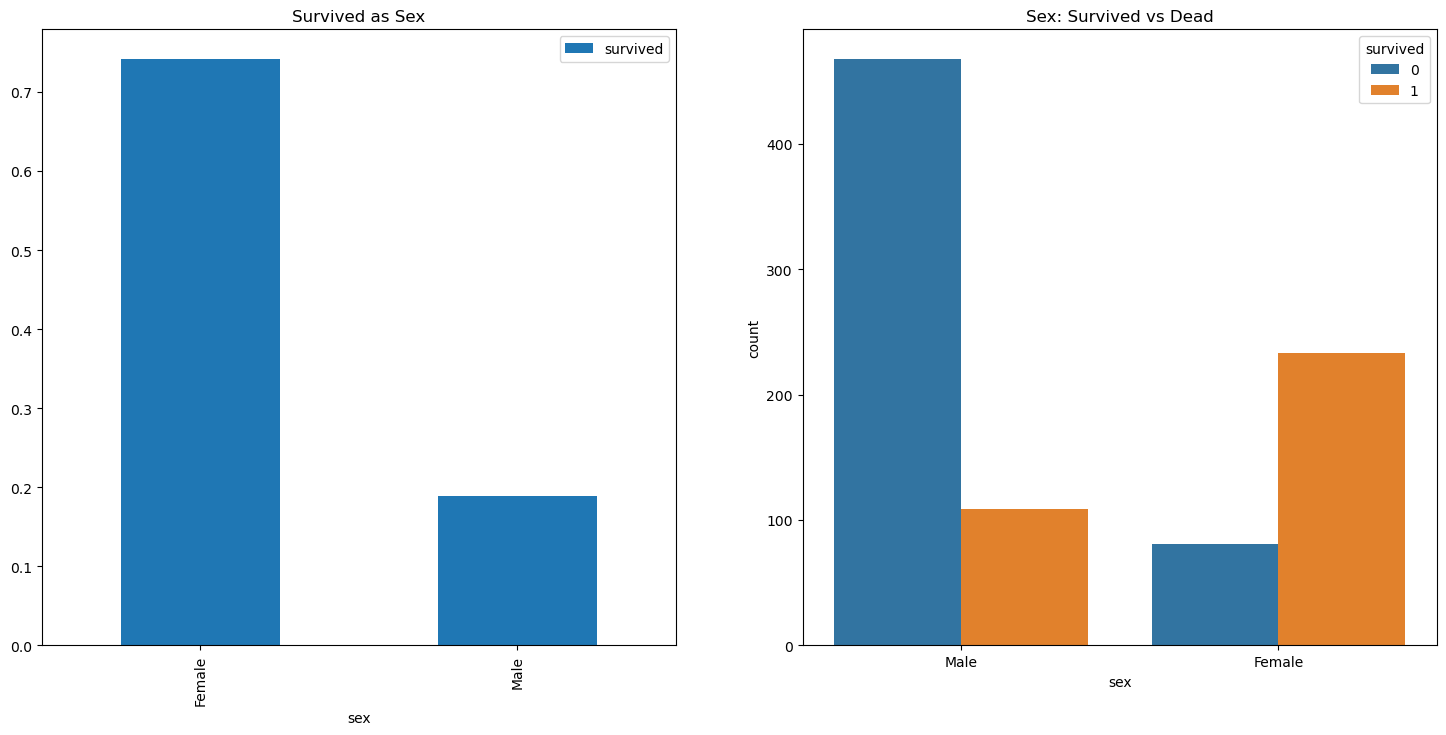

In [66]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_2[['sex', 'survived']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived as Sex')
sns.countplot(x='sex', hue='survived', data=df_2, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

As we can see, even if the total number of male passengers was almost twice of the female passengers, the survival rate of female passengers was higher than male passengers. The female's survival rate in this tragedy is around 74% while male's survival rate was around 19% only.

Now, I will compare the numbers of survivors based on the type of class

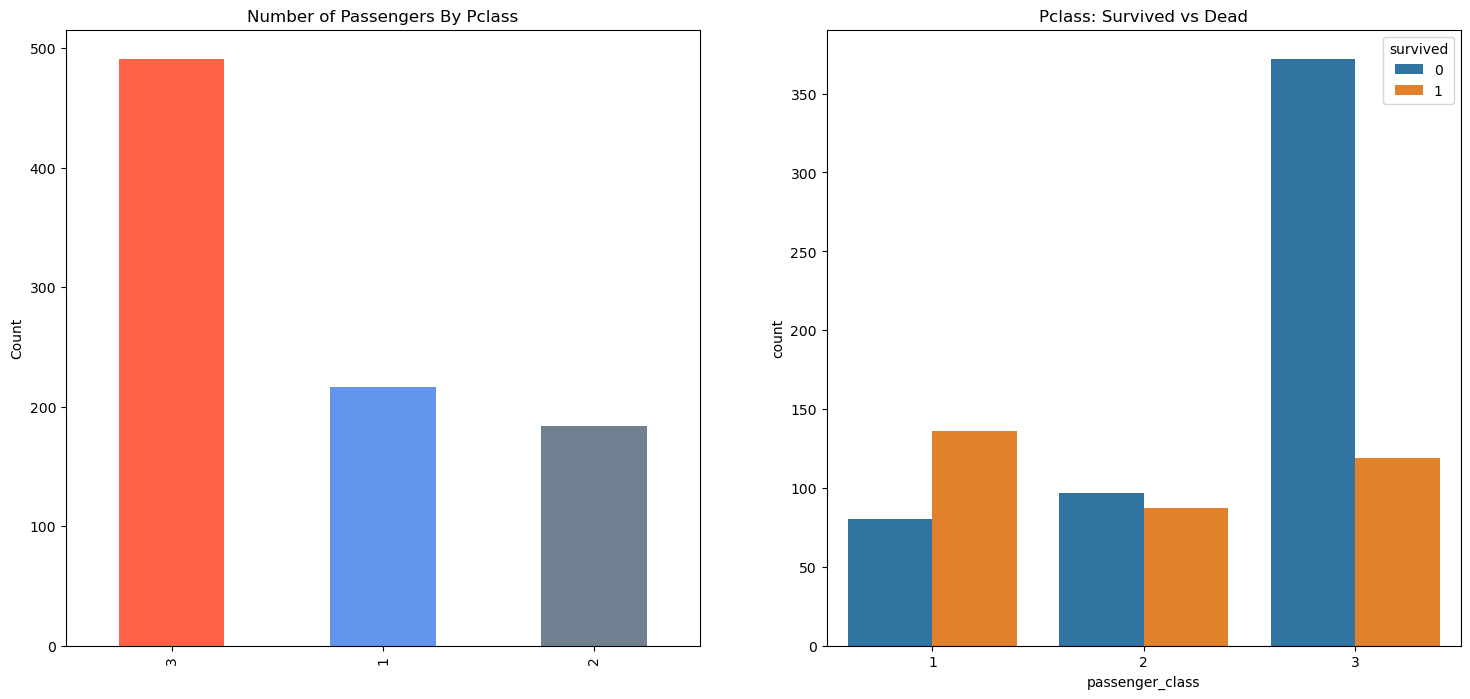

In [67]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df['passenger_class'].value_counts().plot.bar(color=['tomato','cornflowerblue','slategray'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='passenger_class', hue='survived', data=df, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

In [68]:
pd.crosstab(df_1.passenger_class, df_1.survived, margins=True).style.background_gradient(cmap='YlOrRd')

survived,Not Survived,Survived,All
passenger_class,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


As I can see, the class 3 presented the highest number of passengers in the ship. However, when we compare the survival rate based on the class, we can clearly observe that class 1 had a high priority for rescuing during the tragedy.

While for class 1 & class 2 the survival rates were around 62.96% and 47.28% respectively, in class 3, it was only 24.23%.

Now I would like to use the crosstab including the passenger sex:

In [69]:
pd.crosstab([df_1.sex, df_1.survived], df_1.passenger_class, margins=True).style.background_gradient(cmap='YlOrRd')

By looking at the above tab, we can clearly see that if you were a female in class 1 your chances of surviving were very high. Only 3 out of 94 women died (3.19% of the total), while in class 3, 72 out of 144 women had died in the tragedy (50% of the total).

Moreover, it is also possible to conclude that, based on the above result, regardless of the class, women were given higher priority in the rescue than men passengers.

In [70]:
# Geting the summary stats for numeric columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
passenger_class,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
sex,891.0,0.647587,0.477990,0.00,0.0000,1.0000,1.0,1.0000
age,891.0,28.566970,13.199572,0.42,22.0000,24.0000,35.0,80.0000
sib_sp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Standard deviation tells us about the variability of values in the dataset. As we could see, the Std is close to zero for most of the variants, however, age and specially fare demonstrated a big variation.

I will use a histogram to see the distribution of age and fare columns with the mean and median.

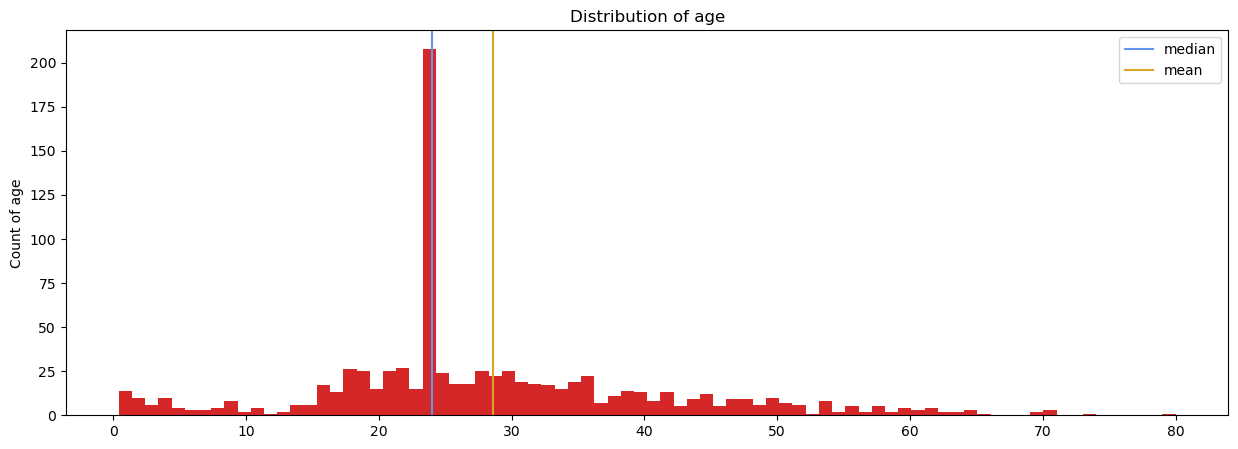

In [71]:
plt.figure(figsize=(15, 5))

plt.hist(df['age'], bins=80, color='tab:red')

# Overplot mean and median ages
plt.axvline(df['age'].median(), color='cornflowerblue', label='median')
plt.axvline(df['age'].mean(), color='goldenrod', label='mean')


plt.title('Distribution of age')
plt.ylabel('Count of age')
plt.legend()

plt.show()

Checking the above graphic, if we ignore the peak around 25, the distribution of age appears to be normal ish.

The median is located close to that peak at age of 25 years old, while the mean close to 28 years old.

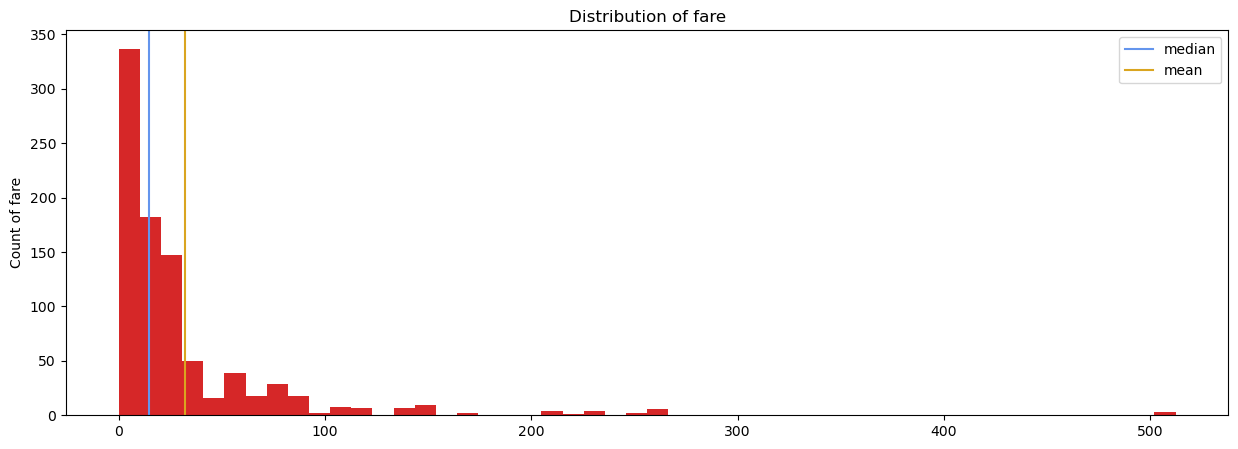

In [72]:
plt.figure(figsize=(15, 5))

plt.hist(df['fare'], bins=50, color='tab:red')

# Overplot mean and median ages
plt.axvline(df['fare'].median(), color='cornflowerblue', label='median')
plt.axvline(df['fare'].mean(), color='goldenrod', label='mean')


plt.title('Distribution of fare')
plt.ylabel('Count of fare')
plt.legend()

plt.show()

The distribution of likes appears to be more of a right-skewed type distribution. The median would look to be close to the peak of the distribution. While the mean would be closer to the lower side.

Now that I have checked the distribution of some of the numeric columns, I would like to check the covariance and correlation between these columns.

In [73]:
df.cov()

,survived,passenger_class,sex,age,sib_sp,parch,fare
survived,0.236772,-0.137703,-0.126376,-0.339588,-0.018954,0.032017,6.221787
passenger_class,-0.137703,0.699015,0.052712,-3.930805,0.076599,0.012429,-22.830196
sex,-0.126376,0.052712,0.228475,0.462953,-0.060422,-0.094584,-4.330946
age,-0.339588,-3.930805,0.462953,174.228695,-3.382908,-1.650393,70.548131
sib_sp,-0.018954,0.076599,-0.060422,-3.382908,1.216043,0.368739,8.748734
parch,0.032017,0.012429,-0.094584,-1.650393,0.368739,0.649728,8.661052
fare,6.221787,-22.830196,-4.330946,70.548131,8.748734,8.661052,2469.436846


By observing the covariance table, it appears that passenger class, age, and sex show a negative covariance with survived column. We will take a look at The Correlation Matrix to understand a little bit more about it.

In [74]:
df.corr()

,survived,passenger_class,sex,age,sib_sp,parch,fare
survived,1.000000,-0.338481,-0.543351,-0.052872,-0.035322,0.081629,0.257307
passenger_class,-0.338481,1.000000,0.131900,-0.356187,0.083081,0.018443,-0.549500
sex,-0.543351,0.131900,1.000000,0.073377,-0.114631,-0.245489,-0.182333
age,-0.052872,-0.356187,0.073377,1.000000,-0.232411,-0.155118,0.107554
sib_sp,-0.035322,0.083081,-0.114631,-0.232411,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.245489,-0.155118,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,-0.182333,0.107554,0.159651,0.216225,1.000000


For a better visualization, I will show the correlation in a heat map.

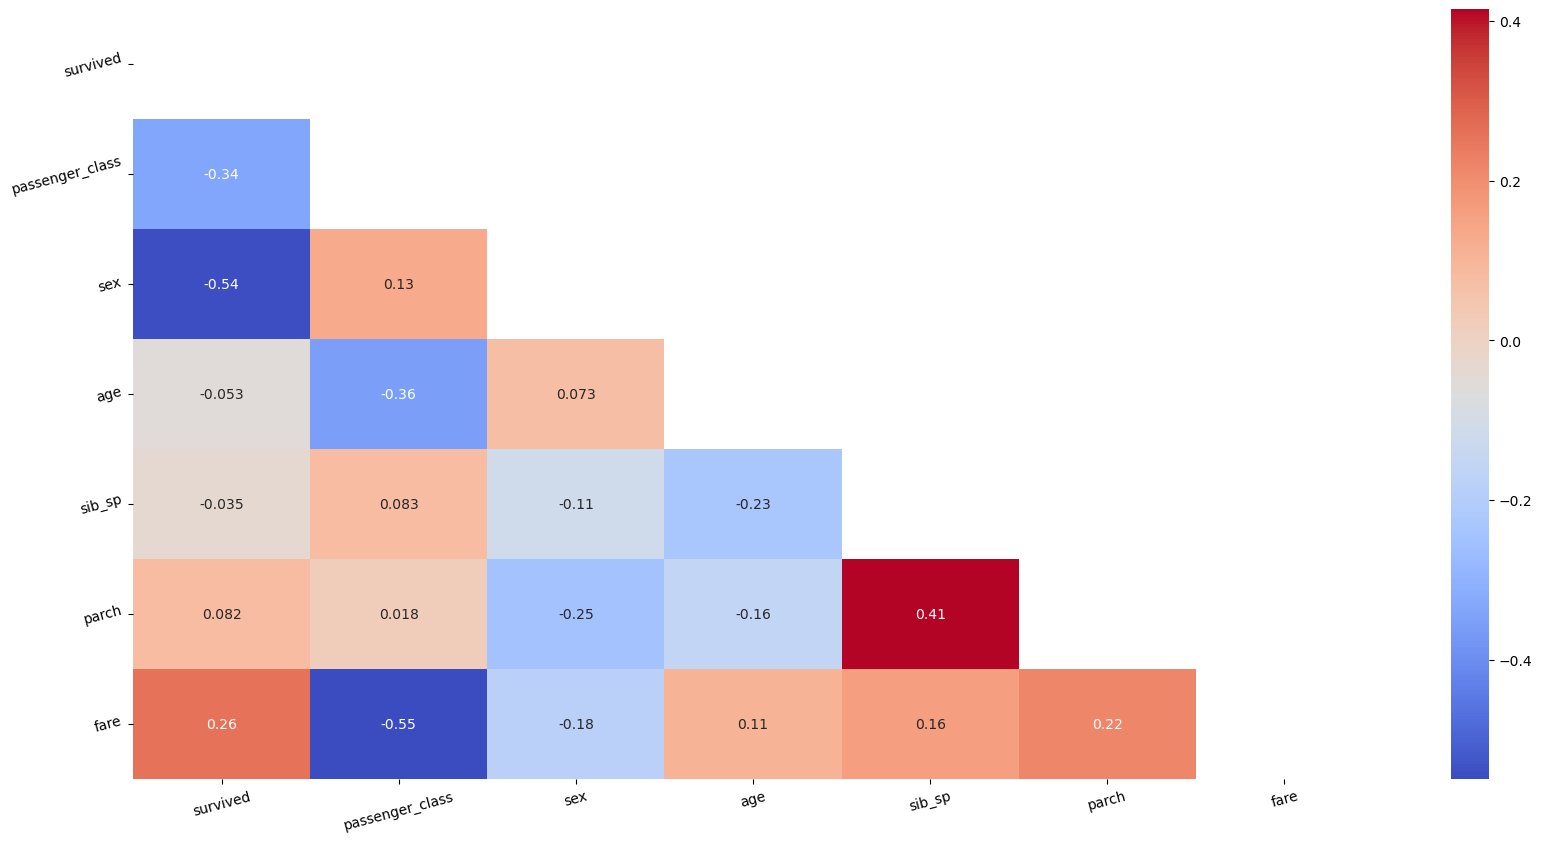

In [75]:
plt.figure(figsize=(20,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.xticks(rotation=15)
plt.yticks(rotation=15)
plt.show()

Positive Correlation: If an increase in feature A leads in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

Negative Correlation: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

When we look the above heatmap, it is possible to identify the highest correlation is between sib_sp and parch (0.41). Therefore, we can continue with all features.

*****
## Feature Engineering

Feature engineering is the process of checking, extracting, and organizing the important features from the data you are working on. That means, we can produce new features using the other features.

Therefore, in this part I will check on the features and see if I can produce a new feature that will help better the Model.

**Age Group**

Age is a good feature that we can easily separate into groups/bands.

The maximum age of the passenger was 80. Therefore, we can divide it in 5 different groups and rearrange it into groups of 16 (80/5=16).

In [76]:
df['age_group'] = 0
df.loc[df['age']<=16, 'age_group'] = 0
df.loc[(df['age']>16)&(df['age']<=32), 'age_group'] = 1
df.loc[(df['age']>32)&(df['age']<=48), 'age_group'] = 2
df.loc[(df['age']>48)&(df['age']<=64), 'age_group'] = 3
df.loc[df['age']>64, 'age_group'] = 4
df.head() # Check if worked

,survived,passenger_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,age_group
0,0,3,1,22.0,1,0,A/5 21171,7.2500,unknown,S,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,1
3,1,1,0,35.0,1,0,113803,53.1000,C123,S,2
4,0,3,1,35.0,0,0,373450,8.0500,unknown,S,2


In [77]:
# checking the number of passengers in each group.
df['age_group'].value_counts().to_frame().style.background_gradient(cmap='coolwarm')

,age_group
1,523
2,188
0,100
3,69
4,11


**Family Size vs Alone**

Another important feature we could create is based on the family size of the passenger. We could combine the variables 'parch' and 'sib_sp' to check if survival rate has any connection with family size of the passengers. In addition, 'alone' will present whether a passenger is alone or not.

In [78]:
df['family_size'] = 0
df['family_size'] = df['parch'] + df['sib_sp'] # family size
df['alone'] = 0
df.loc[df.family_Size == 0, 'alone'] = 1 # Alone

AttributeError: 'DataFrame' object has no attribute 'family_Size'

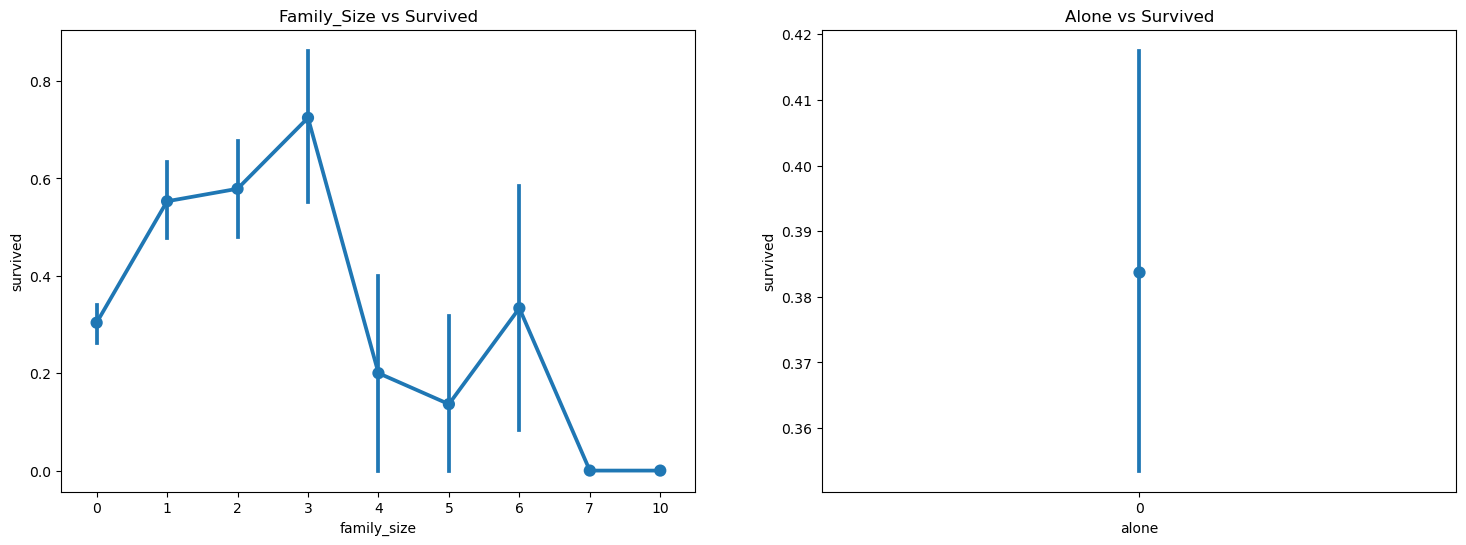

In [79]:
f, ax = plt.subplots(1,2, figsize=(18,6))
sns.pointplot(x='family_size', y='survived', data=df, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='alone', y='survived', data=df, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

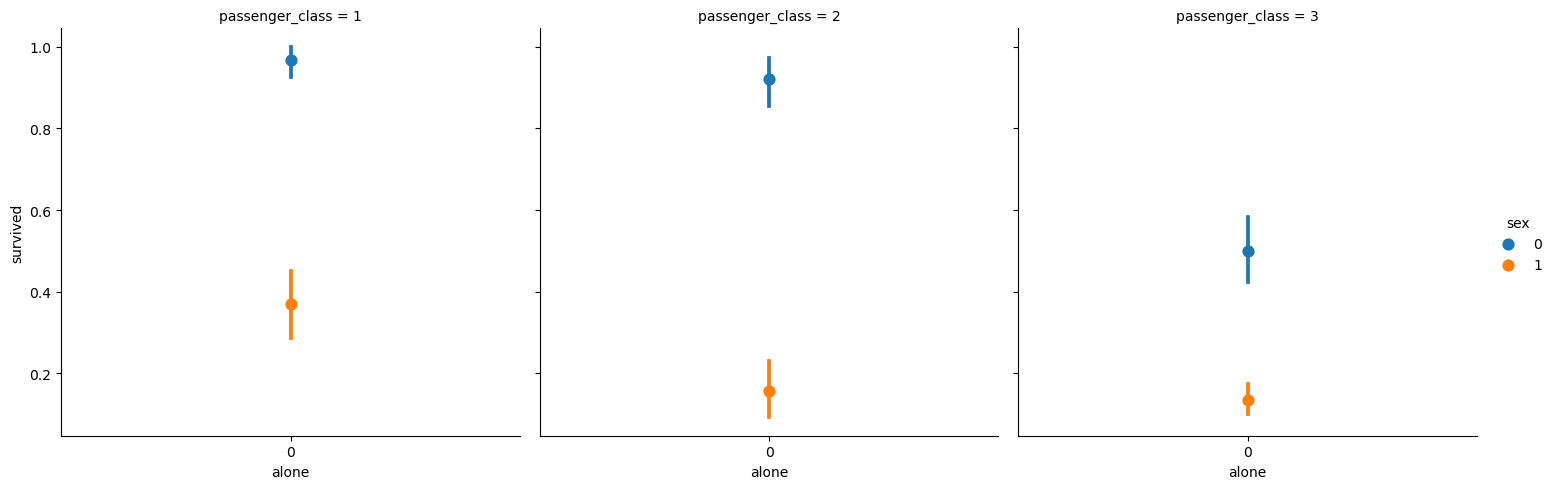

In [80]:
sns.catplot(x='alone', y='survived', data=df, hue='sex', col='passenger_class', kind='point')
plt.show()

By looking at the above graphic, it is possible to conclude that being alone is harmfull irrespective of 'sex' of the 'passenger_class' except for 'passenger_class'=3. When 'passenger_class'=3, the chances of the female passenger to survive when being alone is higher than those with a family.

**Fare Range**

In [81]:
df.head() # to have a look on the available variables

,survived,passenger_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,age_group,family_size,alone
0,0,3,1,22.0,1,0,A/5 21171,7.2500,unknown,S,1,1,0
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,1,0,0
3,1,1,0,35.0,1,0,113803,53.1000,C123,S,2,1,0
4,0,3,1,35.0,0,0,373450,8.0500,unknown,S,2,0,0


By looking at the available variables, we see that 'fare' is a continuous variable that could be converted into ordinal value in order to produce more insights.

Therefore, we will use pandas.cut to split equally the values into 5 beans.

In [82]:
df['fare_group'] = pd.qcut(df['fare'], 5)
df.groupby(['fare_group'])['survived'].mean().to_frame().style.background_gradient(cmap='coolwarm')

,survived
fare_group,
"(-0.001, 7.854]",0.217877
"(7.854, 10.5]",0.201087
"(10.5, 21.679]",0.424419
"(21.679, 39.688]",0.444444
"(39.688, 512.329]",0.642045


As we discussed earlier, fare has a great deal of impact on chances of survival.

In order to have better results in our model, we need to adjust the values and put them into groups as we did before. 

In [83]:
df['fare_cat'] = 0
df.loc[df['fare']<=7.91, 'fare_cat'] = 0
df.loc[(df['fare']>7.91)&(df['fare']<=14.454), 'fare_cat'] = 1
df.loc[(df['fare']>14.454)&(df['fare']<=31.0), 'fare_cat'] = 2
df.loc[(df['fare']>=31.0)&(df['fare']<=512.329), 'fare_cat'] = 3

In [84]:
df.head() # Check if worked

,survived,passenger_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,age_group,family_size,alone,fare_group,fare_cat
0,0,3,1,22.0,1,0,A/5 21171,7.2500,unknown,S,1,1,0,"(-0.001, 7.854]",0
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,"(39.688, 512.329]",3
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,1,0,0,"(7.854, 10.5]",1
3,1,1,0,35.0,1,0,113803,53.1000,C123,S,2,1,0,"(39.688, 512.329]",3
4,0,3,1,35.0,0,0,373450,8.0500,unknown,S,2,0,0,"(7.854, 10.5]",1


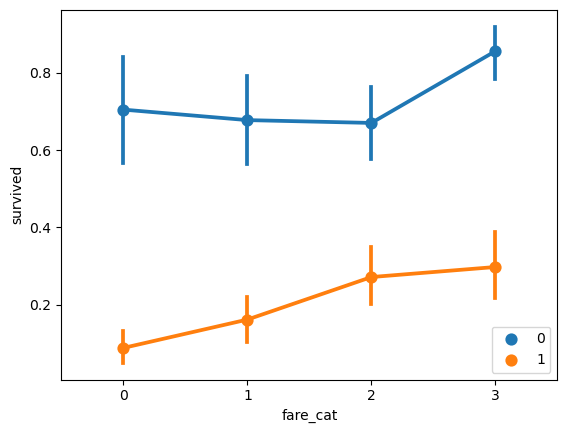

In [85]:
sns.pointplot(x='fare_cat', y='survived', data=df, hue='sex')
plt.legend(loc='best')
plt.show()

It is possible to conclude that as the fare_cat increases, the survival chances also increase.

In [86]:
df.head()

,survived,passenger_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,age_group,family_size,alone,fare_group,fare_cat
0,0,3,1,22.0,1,0,A/5 21171,7.2500,unknown,S,1,1,0,"(-0.001, 7.854]",0
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,"(39.688, 512.329]",3
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,1,0,0,"(7.854, 10.5]",1
3,1,1,0,35.0,1,0,113803,53.1000,C123,S,2,1,0,"(39.688, 512.329]",3
4,0,3,1,35.0,0,0,373450,8.0500,unknown,S,2,0,0,"(7.854, 10.5]",1


Now that we have worked with our variables, we can drop some features that will not be useful for our modeling.

**Age**- We created the age_group, so we do not need this variable

**Tickets**- This variable is too difficult to categorize

**Fare & Fare_Group**- We have created fare_group, so we do not need this variable

**Cabin**- This variable has to many NaN and is very difficult to categorize

In [87]:
# dropping the above variables

df.drop(['age','ticket','fare','cabin','fare_group'], axis=1, inplace=True)

In [88]:
# Checking if it worked

df.head()

,survived,passenger_class,sex,sib_sp,parch,embarked,age_group,family_size,alone,fare_cat
0,0,3,1,1,0,S,1,1,0,0
1,1,1,0,1,0,C,2,1,0,3
2,1,3,0,0,0,S,1,0,0,1
3,1,1,0,1,0,S,2,1,0,3
4,0,3,1,0,0,S,2,0,0,1


It looks like we have forgoten to convert the variable 'embarked' into numeric value.

So, before starting modeling, we need to do it.

In [89]:
df['embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)

In [90]:
# Checking if it worked

df.head()

,survived,passenger_class,sex,sib_sp,parch,embarked,age_group,family_size,alone,fare_cat
0,0,3,1,1,0,0,1,1,0,0
1,1,1,0,1,0,1,2,1,0,3
2,1,3,0,0,0,0,1,0,0,1
3,1,1,0,1,0,0,2,1,0,3
4,0,3,1,0,0,0,2,0,0,1


Now, we can use the heat map to check on ou variables:

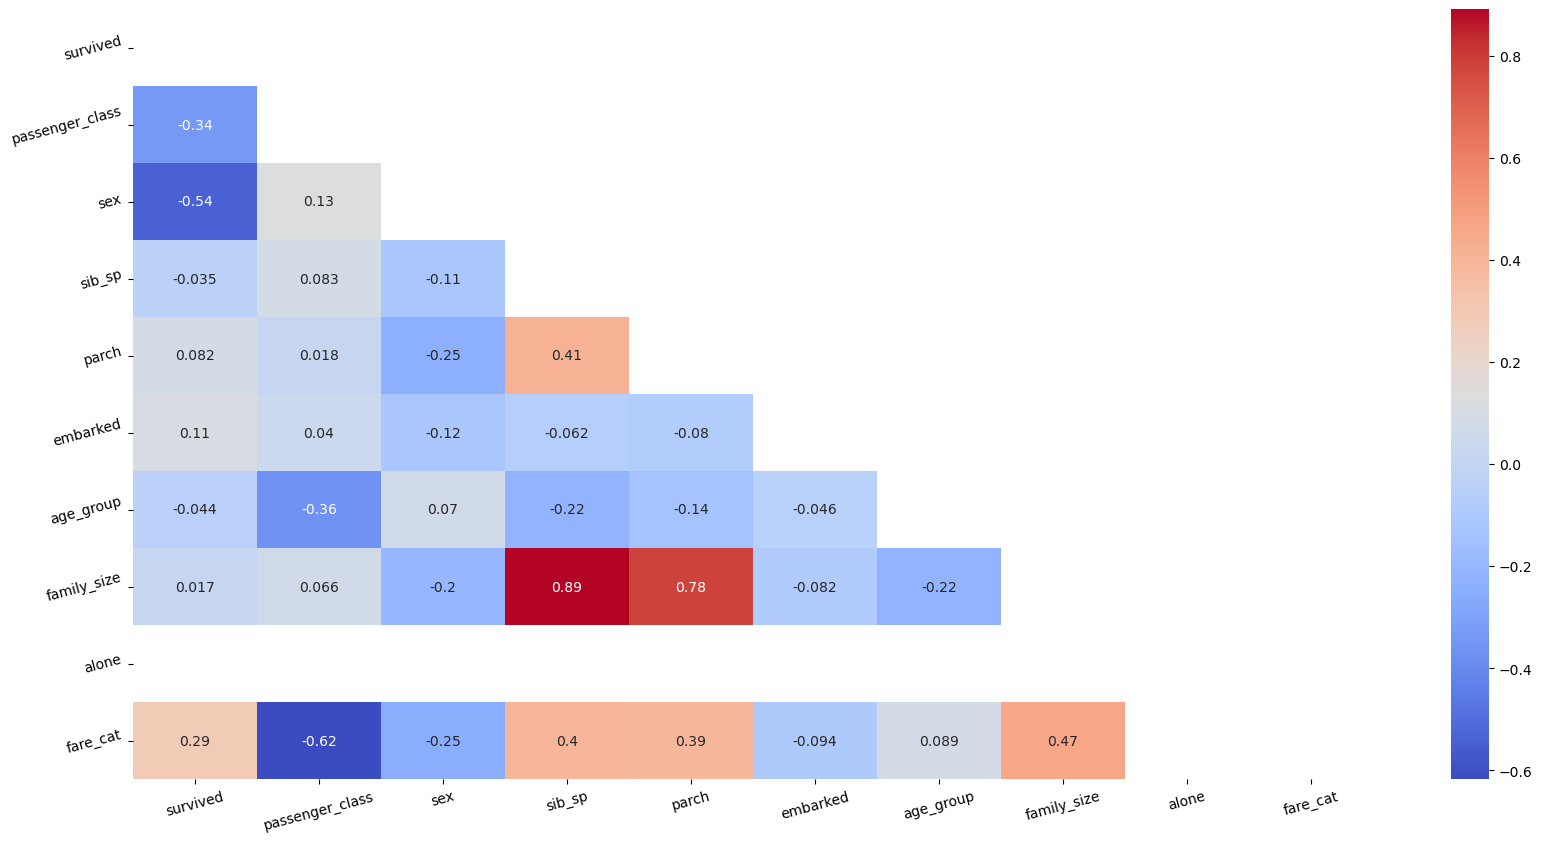

In [91]:
plt.figure(figsize=(20,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.xticks(rotation=15)
plt.yticks(rotation=15)
plt.show()

As we can see on the above correlation plot, 'sib_sp' and 'parch' presented a positive relation with 'family_size’ while alone presented a negative relation with 'family_size'.

### Testing the model

Our goal in this part is to find the scaler / machine learning classifier combination that results in the best predictive model for classifying whether someone survived the Titanic disaster.

In [92]:
# Assigning our features to X 
X = df.drop(['survived'], axis=1)

# Assigning our target to y 
y = df['survived']

# Check 
display(X)
print(y)

,passenger_class,sex,sib_sp,parch,embarked,age_group,family_size,alone,fare_cat
0,3,1,1,0,0,1,1,0,0
1,1,0,1,0,1,2,1,0,3
2,3,0,0,0,0,1,0,0,1
3,1,0,1,0,0,2,1,0,3
4,3,1,0,0,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,0,0,0,1,0,0,1
887,1,0,0,0,0,1,0,0,2
888,3,0,1,2,0,1,3,0,2
889,1,1,0,0,1,1,0,0,2


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


In [93]:
# Splitting our data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

# Check 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(668, 9) (223, 9) (668,) (223,)


Now that we have our `X_train` and `X_test`, let's transform them with our two different scalers. 

We need to remember to follow the 3 following steps: 
1. Instantiate the scaler
2. Fit the scaler to the **training** data 
3. Transform both the training and test features

**MinMaxScaler**

In [94]:
# Instantiate the scaler
MM = MinMaxScaler()

# Fit the scaler and transform both data subsets
X_train_mm = MM.fit_transform(X_train)     # we can fit and transform 'X_train' in the same step
X_test_mm = MM.transform(X_test)

**StandardScaler**

In [95]:
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_train_ss = SS.fit_transform(X_train)
X_test_ss = SS.transform(X_test)

## Let's fit the different Sklearn Machine Learning Classifiers

### Logistic Regression
We will start with the `LogisticRegression()` and try out different C values.

**the smaller the `C`, the greater the regularization strength**.

By trying out different C values and checking the model's accuracy scores, we are trying to find the sweet spot where we're neither too harsh nor too leniant.

**Fitting Logistic Regression model to normalized data**

We will use a **for** loop to test each values of **C** in turn. Soon, we will learn about other functions in *scikit learn* which can make this process much more automated.

In [96]:
start = time.time()

# The C_values to try
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# Empty lists to append train and test accuracy scores to 
train_acc_mm = []
test_acc_mm = []

# Loop through the different C values
for C in C_values:

    # Instantiate the model, increase max_iter to 1000 
    logit = LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Fit the model 
    logit.fit(X_train_mm, y_train)

    # Score the model 
    train_acc_mm.append(logit.score(X_train_mm, y_train))
    test_acc_mm.append(logit.score(X_test_mm, y_test))

stop = time.time()
runtime_logit_mm = stop-start
print(f"Runtime: {round(runtime_logit_mm,2)} seconds")

Runtime: 0.05 seconds


Visualizing the accuracy scores for the different C values: 

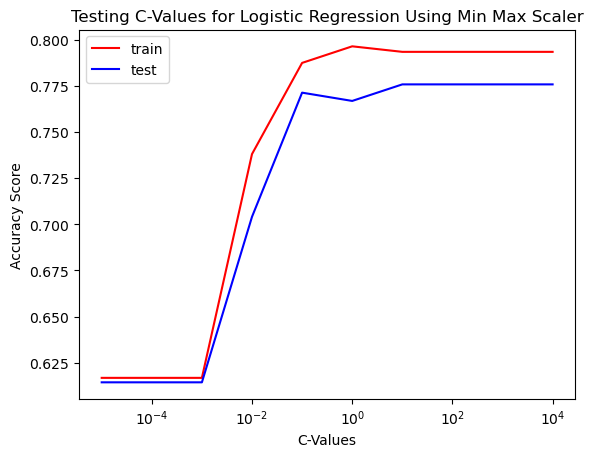

In [97]:
# visualize accuracies for different C-values
plt.figure()
plt.plot(C_values, train_acc_mm, c='red', label='train')
plt.plot(C_values, test_acc_mm, c='blue', label='test')
plt.xscale('log')
plt.xlabel('C-Values')
plt.ylabel('Accuracy Score')
plt.title('Testing C-Values for Logistic Regression Using Min Max Scaler')
#plt.axvline(0.1, linestyle='--')
#plt.axvline(1, linestyle='--')
plt.legend()
plt.show()

There is justification to select `C = 0.1` (10<sup>-1</sup>) because the plots begin to level off at this point. However, C of 10<sup>0</sup> = 1 appears to be optimal as the train and test accuracy scores were closest while still being high.

In [98]:
# Getting our best Logistic Regression
# Instantiate the model 
logit_mm = LogisticRegression(C=1, random_state=42)

# Fit the model 
logit_mm.fit(X_train_mm, y_train)

# Store accuracy scores
logit_mm_train = logit_mm.score(X_train_mm, y_train)
logit_mm_test = logit_mm.score(X_test_mm, y_test)

# Score the model 
print(f"Train Accuracy: {logit_mm_train}")
print(f"Test Accuracy: {logit_mm_test}")

Train Accuracy: 0.7964071856287425
Test Accuracy: 0.7668161434977578


**Fitting Logistic Regression model to standardized data**

In [99]:
start = time.time()

# Empty lists to append the training and test accuracy scores to  
train_acc_ss = []
test_acc_ss = []

# Loop through the same C values 
for C in C_values:

    # Instantiate the model 
    logit=LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Fit the model 
    logit.fit(X_train_ss, y_train)

    # Score the model 
    train_acc_ss.append(logit.score(X_train_ss, y_train))
    test_acc_ss.append(logit.score(X_test_ss, y_test))
    
stop = time.time()
runtime_logit_ss = stop-start
print(f"Runtime: {round(runtime_logit_ss,2)} seconds")

Runtime: 0.04 seconds


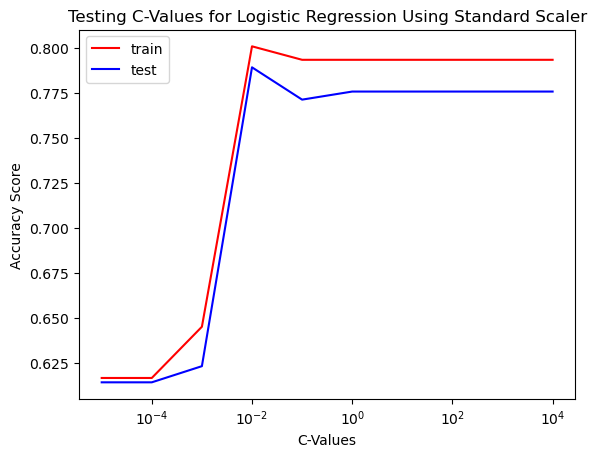

In [100]:
# Plotting the train and test scores for every C value 
plt.figure()
plt.plot(C_values, train_acc_ss, c='red', label='train')
plt.plot(C_values, test_acc_ss, c='blue', label='test')
plt.xscale('log')
plt.xlabel('C-Values')
plt.ylabel('Accuracy Score')
plt.title('Testing C-Values for Logistic Regression Using Standard Scaler')
#plt.axvline(.01, linestyle = '--')
plt.legend()
plt.show()

In this instance, our best Logistic Regression model was at **C** equal to 10<sup>-2</sup> = 0.01. We can see clearly the tell-tale *elbow* which indicates the bulk of learning has been completed and a point beyond which overfitting might be a concern. Let's take a look at the model's performance: 

In [101]:
# The Logistic Regression that performed the best on the standardized data 
# Instantiate the model
logit_ss = LogisticRegression(C=0.01, random_state=42)

# Fit the model 
logit_ss.fit(X_train_ss, y_train)

# Store accuracy scores
logit_ss_train = logit_ss.score(X_train_ss, y_train)
logit_ss_test = logit_ss.score(X_test_ss, y_test)

# Score the model 
print(f"Train Accuracy: {logit_ss_train}")
print(f"Test Accuracy: {logit_ss_test}")

Train Accuracy: 0.8008982035928144
Test Accuracy: 0.7892376681614349


We observe that the training accuracy is identical for each of our fitted models. However, the model fitted to standardized data gives lower test accuracy.

### Plotting Both the Scalers on Same Plot for Logistic Regression <a id="1"></a>

We can plot the results for both the scalers on the same plot to see the difference that the scaling has made. 

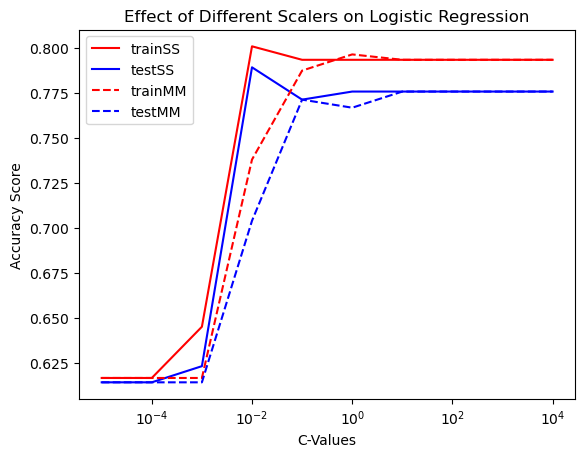

In [102]:
# Plotting the train and test scores for every C value 
plt.figure()
plt.plot(C_values, train_acc_ss, c='red', label='trainSS')
plt.plot(C_values, test_acc_ss, c='blue', label='testSS')
plt.plot(C_values, train_acc_mm, linestyle = '--', c='red', label='trainMM')
plt.plot(C_values, test_acc_mm, linestyle = '--', c='blue', label='testMM')
plt.xscale('log')
plt.xlabel('C-Values')
plt.ylabel('Accuracy Score')
plt.title('Effect of Different Scalers on Logistic Regression')
plt.legend()
plt.show()

### K-Nearest Neighbors
Let's try `KNeighborsClassifier()`. We will try different `n_neighbors` for both sets of transformed data again. 

- n_neighbors parameter `K` is the number of nearest neighbors, when the value of `K` is too low, the model picks only the values that are closest to the data sample, thus forming a very complex decision boundary. Such a model fails to generalize well on the test data set, thereby showing poor results.

**Fitting KNN model to normalized data**

In [105]:
start = time.time()

# The different K values to try out and save to 'neighbors'
neighbors = range(1, 50)

# Empty lists to append the accuracies to 
train_acc_mm = []
test_acc_mm = []

# Loop through neighbors
for K in neighbors:
    
    # Instantiate the model 
    knn = KNeighborsClassifier(n_neighbors=K)
    
    # Fit the model 
    knn.fit(X_train_mm, y_train)
    
    # Score the model 
    train_acc_mm.append(knn.score(X_train_mm, y_train))
    test_acc_mm.append(knn.score(X_test_mm, y_test))
    
stop = time.time()
runtime_knn_mm = stop-start
print(f"Runtime: {round(runtime_knn_mm,2)} seconds")

Runtime: 0.91 seconds


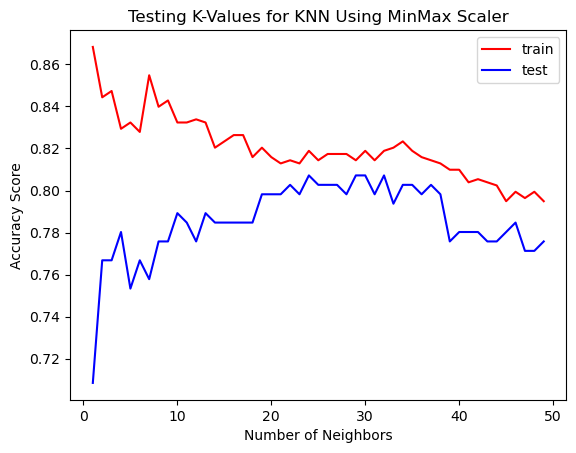

In [106]:
# Plot the accuracies 
plt.figure()
plt.plot(neighbors, train_acc_mm, c='red', label='train')
plt.plot(neighbors, test_acc_mm, c='blue', label='test')
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Score")
plt.title('Testing K-Values for KNN Using MinMax Scaler')
#plt.axvline(41, linestyle = '--')
plt.legend()
plt.show()

These plots are quite choppy so conclusions will be somewhat subjective. However, the gap between the two plots is at its narrowest at around `n_neighbors = 32`.

In [107]:
# KNN that performed best on scaled data
# Instantiate the model
knn_mm = KNeighborsClassifier(n_neighbors=41)

# Fit the model 
knn_mm.fit(X_train_mm, y_train)

# Store accuracy scores
knn_mm_train = knn_mm.score(X_train_mm, y_train)
knn_mm_test = knn_mm.score(X_test_mm, y_test)

# Score the model 
print(f"Train Accuracy: {knn_mm_train}")
print(f"Test Accuracy: {knn_mm_test}")

Train Accuracy: 0.8038922155688623
Test Accuracy: 0.7802690582959642


**Fitting KNN model to normalized data**

In [108]:
start = time.time()

# Empty lists to append to 
train_acc_ss = []
test_acc_ss = []

# Loop through the neighbors 
for k in neighbors: 
    
    # Instantiate the model 
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model 
    knn.fit(X_train_ss, y_train)
    
    # Score the model 
    train_acc_ss.append(knn.score(X_train_ss, y_train))
    test_acc_ss.append(knn.score(X_test_ss, y_test))
    
stop = time.time()
runtime_knn_ss = stop-start
print(f"Runtime: {round(runtime_knn_ss,2)} seconds")

Runtime: 1.03 seconds


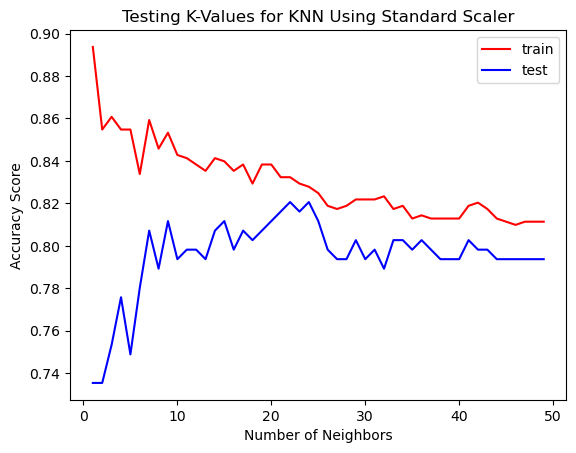

In [109]:
# Plot the accuracies
plt.figure()
plt.plot(neighbors, train_acc_ss, c='red', label='train')
plt.plot(neighbors, test_acc_ss, c='blue', label='test')
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Score")
plt.title('Testing K-Values for KNN Using Standard Scaler')
#plt.axvline(11, linestyle = '--')
#plt.axvline(23, linestyle = '--')
plt.legend()
plt.show()

There are defintely arguments for `n_neighbors=20` (test accuracy peaks) or `n_neighbors=25` (the 'gap' is at its narrowest).

In [110]:
# Best KNN on standardized data
# Instantiate the model 
knn_ss = KNeighborsClassifier(n_neighbors=23)

# Fit the model 
knn_ss.fit(X_train_ss, y_train)

# Store accuracy scores
knn_ss_train = knn_ss.score(X_train_ss, y_train)
knn_ss_test = knn_ss.score(X_test_ss, y_test)

# Score the model 
print(f"Train Accuracy: {knn_ss_train}")
print(f"Test Accuracy: {knn_ss_test}")

Train Accuracy: 0.8293413173652695
Test Accuracy: 0.8161434977578476
